# Random Forest

Processo é bem parecido com a de árvore de decisão.

## Importação e Limpeza

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# from sklearn.tree import export_graphviz
# import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
dataset = pd.read_csv('insurance.csv')
dataset

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,Mileage,Antilock,DrivingSkill,SeniorTrain,ThisCarCost,Theft,CarValue,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,TwentyThou,False,SubStandard,False,TenThou,False,FiveThou,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,TwentyThou,False,Normal,True,Thousand,False,TenThou,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,Domino,True,Normal,False,Thousand,False,TwentyThou,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,FiftyThou,False,Normal,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,FiftyThou,False,SubStandard,False,TenThou,False,FiveThou,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,TwentyThou,False,SubStandard,False,Thousand,False,FiveThou,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,FiftyThou,False,Normal,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,Domino,True,Expert,False,Thousand,False,FiftyThou,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,TwentyThou,False,Expert,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


### Limpeza e Separação das Variáveis

In [3]:
dataset = dataset.dropna()

In [4]:
dataset = dataset.drop(columns=['Unnamed: 0'])

In [5]:
y = dataset.iloc[:, 7].values # Classe (variável dependente)
X = dataset.iloc[:, [0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values # variáveis independentes

### Label Encoding

In [6]:
labelEncoder = LabelEncoder()

In [7]:
for i in range(X.shape[1]):
    if X[:, i].dtype == 'object':
        X[:, i] = labelEncoder.fit_transform(X[:,i])

In [8]:
if y.dtype == 'object':
    labelEncoder_y = LabelEncoder()
    y = labelEncoder_y.fit_transform(y)

### Dividindo os dados em Treino e Teste

In [9]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

## Criando o modelo

In [13]:
# n_estimators = quantas árvores aleatórias ele vai induzir. Por padrão é 100;
modelo = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=8, max_leaf_nodes=8)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

## Previsões

In [14]:
previsoes = modelo.predict(X_teste)

### Calculando métricas

In [15]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')

Acuracia: 0.8515037593984962, Precisão: 0.8490947489495771, Recall 0.8515037593984962, F1: 0.848849598293294


Valores das métricas:
- Acurácia: 0.8515037593984962
- Precisão com peso: 0.8490947489495771
- Recall: 0.8515037593984962
- F1 Score: 0.848849598293294

## Visualização da Árvore Criada

Pegando a primeira árvore.

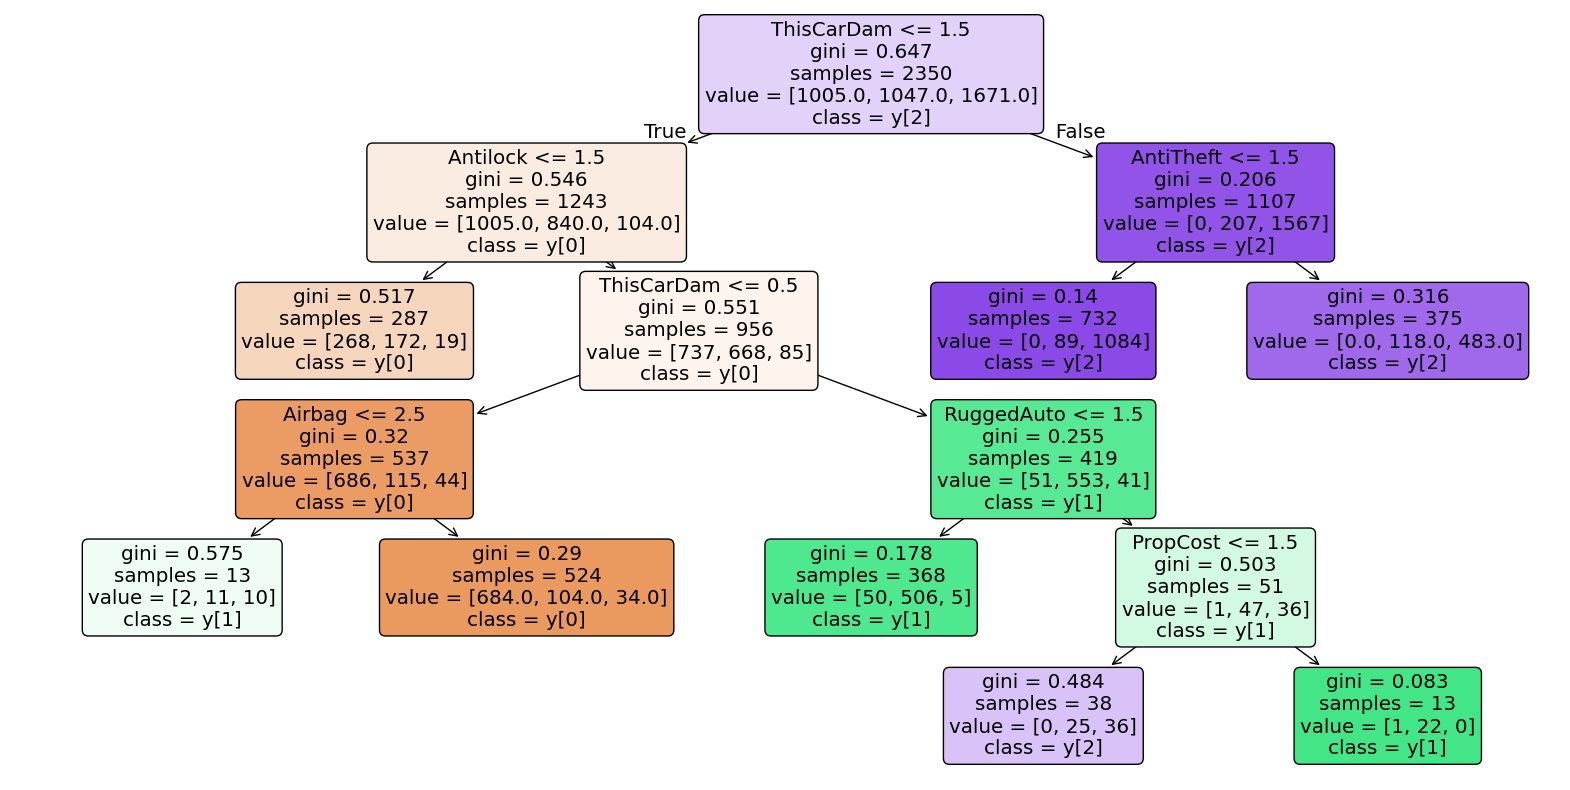

In [16]:
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=dataset.columns[:-1], class_names=True, rounded=True)
plt.show()